### Pandas(Python Data Analysis Library)

pandas는 파이썬에서 사용하는 데이터분석 라이브러리로 행과 열로 이루어진 데이터 객체를 다룰 수 있게 되며 보다 안정적으로 대용량의 데이터를 처리하는데 매우 유용한 도구 디다.

pandas에서는 기본적으로 정의되어 있는 1차원 배열인 `series`와 2차원 배열인 `DataFrame`을 사용한다.

pandas의 자료구조들은 빅데이터 분석에 있어 높은 수준의 성능을 보여준다.

##### 참고site

* pandas문서 : http://pandas.pydata.org/pandas-docs/stable/index.html
* 자료구조 : http://pandas.pydata.org/pandas-docs/stable/dsintro.html

In [1]:
# 데이터분석 주요라이브러리
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 한글처리
from matplotlib import rc
from matplotlib import font_manager
font_name = font_manager.FontProperties(\
               fname='c:/windows/fonts/malgun.ttf').get_name()
#                fname='../data/NanumGothicCoding.ttf').get_name()
rc('font', family=font_name)
rc('axes', unicode_minus=False)# minus처리

In [ ]:
pd.show_versions() # full package version
pd.__version__ # pd version

#### 1. Series

In [ ]:
# 1. Series 자료생성(1) - 기본
# 인덱스와 값을 가지는 1차원 배열
# 만드는 방법은 값들의 리스트를 전달해서 생성한다. 인덱스는 자동으로
# 기본정의 되는 정수인덱스를 사용한다. 단, 인덱스를 정의하지 않으면
# 0부터 순번으로 부여된다.

ser1 = pd.Series([1,2,3,5, np.nan, 6, 7, 8])
print(ser1)
ser1.plot()

In [ ]:
# 2. Series 자료생성(2) - 인덱스정의
# 기본숫자인덱스 vs 문자인덱스
ser2 = pd.Series([3,6,9,12], index=None)
print(ser2)
print(ser2[1])

ser3 = pd.Series([3,6,9,12], index=[2016,2017,2018,2019])
print(ser3)
print(ser3[2017])

In [ ]:
# 시각화
ser3.plot()
plt.show()
ser3.plot(kind='bar')
plt.show()

In [ ]:
# 3. Series 자료생성(3) - 키(인덱스)와 값으로 정의
# dictionary자료형으로 생성해야 한다.
employee = {'홍길동':5000, '손흥민':9000, '홍길순':6500, '홍길자':7000}
ser4 = pd.Series(employee)
print(ser4)

ser4.plot(kind='barh')
plt.show()

#### 2. DataFrame

In [ ]:
# 1. DataFrame 생성(1) - 리스트자료형으로 DF을 생성
# 테이블형식의 2차원배열(정확하게는 Matrix)
df = pd.DataFrame([[1,2,3],[4,5,6], [7,8,9]])
print(df)
df.plot()
plt.show()

l = [[1,2,3],[4,5,6], [7,8,9]]
# l.plot() : l은 리스트형이기 때문에 plot()함수가 없기 때문에 에러발생

In [ ]:
# 2. DataFrame 생성(2) - 딕셔너리자료형으로 DF을 생성
tbl = pd.DataFrame({
    '체중': [80,70,65.5,45.9,70.4],
    '신장': [168,180,178,160,158],
    '성별': ['F', 'M', 'M', 'F', 'F'],
}, index=['소향', '손흥민', '홍길동', '홍길순', '홍길자'])
tbl

In [ ]:
# 손흥민의 신장?
# 접근방법 df[열이름] or df.열이름
print(tbl['신장'])
print(tbl.신장)
print(tbl[tbl.신장 == 180])

In [ ]:
# 실습
# 1. 성별이 남자인 사람만 출력
print(tbl.성별 == "F")
print(tbl[tbl.성별 == "F"])

# 2. 신장이 170이상인 사람만 출력
print(tbl.신장 > 170)
print(tbl[tbl.신장 > 170])

# 3. tbl을 시각화(kind=scatter,bar, line...)
tbl.plot()
plt.show()
tbl.plot(kind='barh')
plt.show()

In [ ]:
# 3. DataFrame 생성(3) - Numpy배열 또는 dictionary로 DF을 생성
#?pd.date_range
dates = pd.date_range('20200101', periods=6, freq='M')
print(dates)
print(type(dates))

df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

data = {
    'names': ['소향', '손흥민', '홍길동', '홍길순', '홍길자'],
    'year': [2015,2016,2017,2018,2019],
    'points': [1.5, 1.7, 2.6, 3.6, 2.9]
}
df = pd.DataFrame(data, pd.date_range('20191201', periods=5))
df

In [ ]:
# describe vs describe()
print(df.describe)   # DF의 속성
print(df.describe()) 

# describe() : 기초통계정보를 출력
# count : 자료갯수
# mean  : 평균
# std   : 표준편차
# min/max : 최소값/최대값
# 25~75% : 4분위수

In [ ]:
# 4. DataFrame 생성(4) - 직접 index와 column을 정의해서 DF을 생성
# NaN : Not a Number
print(data)
df = pd.DataFrame(data,
        columns=['names', 'year', 'points', 'penalty'], # 컬럼명정의 & 추가
        index=['JAN', 'FEB', 'MAR', 'APR', 'MAY'])
df

In [ ]:
# 인덱스, 컬럼, 값을 출력
print(df.index)
print(type(df.index))
print(df.columns)
print(df.values) # data type은 ndarray

# 특정컬럼만 출력
print(df.year)
print(df['names'])

In [ ]:
# 2개이상의 값을 출력 즉, 년도와 이름만 출력
# 대괄호[]를 2개 사용 즉, [[col1, ... coln]]
# 리스트안에 리스트형태로 정의
df[['names', 'year']]

In [ ]:
# 특정열의 값을 변경하기
# NaN(결측치)인 값을 특정값으로 변경
# df['컬럼명'] = value or df.컬럼명 = value
df.penalty = 1.7
df
df.penalty = 0.7
df

In [ ]:
# 1. 컬럼추가(1) : 컬럼이 없을 경우에 자동으로 추가하기
# df[컬럼명]의 형태로 추가해야 한다. df.컬럼명은 불가
df['addvalue1'] = 2.7
df

In [ ]:
# 2. 컬럼추가(2)
df['age'] = np.arange(10, 15)
df

In [ ]:
# 3. 컬럼삭제하기(1)
# df.drop([col1...coln], axis) : axia=0(행), axis=1(열)
# df.drop?
df = df.drop(['penalty'], 1)
df

In [ ]:
# 4. 컬럼삭제하기(2) - del명령어 사용하기
del df['age']
df

In [ ]:
# 인덱스변경
df = pd.DataFrame(data, index=['MON', 'THU', 'WED', 'THR', 'FRI'])
df

In [ ]:
# df에서 슬라이싱과 인덱싱
# 인덱스명으로도 접근할 수 있고, 숫자인덱스로도 접근이 가능
df[0:2]
df['MON':'WED']

#### 3. pandas 기본함수

* csv파일 load/save
 - df = pd.read_csv('../data/file.csv')
 - df.to_csv('../data/file.csv')
* DataFrame의 데이터확인
 - df.shape()
 - df.info()
 - df.columns()
 - df.dtypes
 - df.head(n) : 처음부터, n이 지정이 않되면 5건 지정되면 지정건수
 - df.tail(n) : 맨뒤에서부터
* null갯수확인
 - df.isnull().sum()
* 특정 컬럼/행을 삭제
 - df = df.drop([컬럼명], axis=1)
 - df = df.drop(["행"])
* 특정컬럼이름 변경
 - df = df.rename(columns={'A':'AA'})
* 특정컬럼의 값을 새로운 컬럼으로 만들기
 - df['A'] = df['B'].str[:5] : 왼쪽에서 5개문자열
 - df['A'] = df['B'].str[:-5] : 오른쪽에서 5개문자열 
* 컬럼순서를 변경
 - df = pd.DataFrame(df, columns=['C','B','A']) -> ABC를 CBA로 변경
* df합치기
 - df_result = pd.concat([df1, df2], ignore_index=True)
* df중복확인, 제거
 - df.duplicated() : 중복확인
 - df.drop_duplicates() : 중복제거
* df의 행, 열의 위치
 - df.loc()
 - df.iloc()

In [ ]:
# 1. head() 앞에서 5행, tail() 뒤에서 5행, 숫자지정되었다면 숫자만큼
print(df.head(2))
print(df.tail(2))

In [ ]:
# 2. loc() : df에서 열이나 행을 선택하는 함수
# 숫자인덱스사용은 불가, 행 or 열이름으로 접근
# 한행만 선택했을 경우에는 text형태로, 2개이상일 경우는 table형태로 출력
df = pd.DataFrame(data, index=['one', 'two', 'three', 'four', 'five'])
df

df.loc['two'] # 인덱스가 'two'인 행을 text형태로 출력
df.loc['two':'four']  # 인덱스가 'two'~'four'행을 테이블형태로 출력
# df.loc[0] # 에러

# 조금 더 복잡한 loc()
# 전체행중에 year, names만 선택 : [[컬럼1....컬럼n]]
df[['year', 'names']]
df.loc['two':'four',['year', 'names']]
#df.loc?

In [ ]:
# 3. iloc() # 숫자인덱스로 접근 가능
df.iloc[3]

# 행과 열범위를 지정해서 출력
df.iloc[1:4,0:2]

# 콜론 없이 출력
df.iloc[1,1] # x,y위치

#df.iloc?

In [ ]:
# bool인덱스 : 조건이 일치하는 행만 출력하기
# 2016보다 큰 자료만 출력
df.year > 2016 
df['year'] > 2016
df.loc[df['year'] > 2016, :]

In [ ]:
# 행삭제 
# index가 날짜형태로 된 자료를 삭제할 경우에는 날짜형태의 문자를
# 날짜자료형으로 변경후 삭제
df = pd.DataFrame(np.random.rand(6,4))
df
df.columns = ['A', 'B', 'C', 'D']
df.index = pd.date_range('20200101', periods=6)
df

In [ ]:
# 열삭제
del df['D'] 
df

In [ ]:
# 여러컬럼삭제
df = df.drop(['B', 'C'], 1)
df

In [ ]:
print(type(df.index))
# df = df.drop(['20200103', '20200105']) # 에러
df = df.drop([pd.to_datetime('20200103'), pd.to_datetime('20200105')])
df

#### 4. pandas의 데이터분석용 함수

* sum() : 행 또는 열의 합
* mean() : 행 또는 열의 평균
* var() : 분산
* T : pivot기능
* groupby()
* agg()

In [ ]:
df = pd.DataFrame({
    'weight': [80.0,70.4,65.5,45.9,51.5],
    'height': [170, 180, 155,143,154]
})
df

In [ ]:
# 1. sum() 
# 세로(열)방향 : 기본값, axis=0
# 가로(행)방향 : axis=1
print(df.sum())
print(df.sum(axis=0))

print(df.sum(axis=1))
df.sum?

In [ ]:
# 2. mean()
print(df.mean())
print('신장의 평균 = ', df.height.mean())
print('체중의 평균 = ', df.weight.mean())

In [ ]:
# 3. var()
a = [10,20,30,40,50]
b = [10,30,30,30,50]

df_a = pd.DataFrame(a)
df_b = pd.DataFrame(b)

# 두 집단의 평균은?
print(df_a.mean())
print(df_b.mean())

# 두 집단의 분산은?
print(df_a.var())
print(df_b.var())

# 결과
# 분산 값 a(250) > b(200)의 의미는 a가 b보다 자료가 더 넓게 분포되어 
# 있다는 의미. 즉, 분산은 평균에서 자료가 얼마나 흩어져 있는지를 나타
# 낸다.

In [ ]:
# 4. pivot
print(df_a)
print(df_a.T)
df_a.T?

In [ ]:
'''
Series 처럼 변환 가능한 오브젝트들을 갖고 있는 dict의 형태를 인자로 넣어주어 
DataFrame을 만들 수 있다. 이 때, index는 자동으로 0부터 시작하여 1씩 증가하는 
정수 인덱스가 부여되고, dict의 키 값을 컬럼의 이름으로 사용
'''
df2 = pd.DataFrame({
    'A': range(1,5), # 'A': 1., 
    'B': pd.date_range('20181101', periods=4),  # 'B': pd.Timestamp('20181108'),
    'C': pd.Series(1, index=list(range(4)), dtype='float32'),
    'D': np.array([3]*4, dtype='int32'),
    'E': pd.Categorical(['test', 'train', 'test', 'train']),
    'F': 'foo'
})
df2

In [ ]:
# sort_index(axis, ascending)
df2.sort_index(axis=0, ascending=False)
df2.sort_index(axis=1, ascending=False)
df2.sort_index(1, ascending=False)

In [ ]:
# sort_values(by)
df2.sort_values(by='E')

In [ ]:
# 새로운 데이터 프레임 생성
df3 = pd.DataFrame(np.random.rand(4,3), 
                   columns=['b','d','e'],
                   index=['서울', '부산', '대구', '인천'],
                  )
df3

In [ ]:
# apply() 함수
# 람다(lambda)함수란? 람다식, 람다표현식, 익명함수라고 한다. 
# 구조) lambda 입력 : 출력
# 일반함수
def f(x,y):
    return x + y

print('func=', f(1,1))

# 람다함수
l = lambda x,y:x+y
print('lambda=', l(1,1))

# 람다(lambda)식 : x가 입력되면 최대값에서 최소값을 뺀 값을 리턴
func = lambda x : x.max() - x.min()
df3.apply(func, axis=0) 

#### 5. pandas를 이용한 데이터분석(csv파일)

In [ ]:
input_file = '../data/input.csv'
output_file = '../data/output.csv'

In [ ]:
# 1. csv파일 읽기(1) : 파이썬문법으로만 사용하기
# newline='' : 개행문자('\n')를 무시하고 읽기, 
# 이 옵션이 없으면 빈라인이 추가된다.
with open(input_file, 'r', newline='') as reader:
    with open(output_file, 'w', newline='') as writer:
        header = reader.readline()
        # print(header)
        # strip() : 문자열좌우공백, tab, 개행문자를 제거
        header = header.strip()
        header_list = header.split(',')
        #print(header_list)
        
        # header_list의 각 사이에 쉼표를 삽입, 리스트를 문잔열로 변환
        # 개행문자를 끝에 추가
        # header_list요소를 스트링으로 변환
        # print(map(str, header_list))
        # header행을 문자열로 저장
        #print(','.join(map(str, header_list)) + '\n')
        
        writer.write(','.join(map(str, header_list)) + '\n')
        for row in reader:
            row = row.strip()
            row_list = row.split(',')
            print(row_list)
            writer.write(','.join(map(str, row_list)) + '\n')

In [ ]:
# 2. csv파일 읽기(2) : 파이썬내장모듈(csv) 사용하기
import sys
import csv

output_file = '../data/output1.csv'
with open(input_file, 'r', newline='') as csv_in_file:
    with open(output_file, 'w', newline='') as csv_out_file:
        filereader = csv.reader(csv_in_file, delimiter=',')
        filewriter = csv.writer(csv_out_file, delimiter=',')
        for row in filereader:
            print(row)
            filewriter.writerow(row)

In [ ]:
# 3. csv파일 읽기(3) : pandas 사용하기

output_file = '../data/output2.csv'

# pd.read_csv() : csv파일을 읽어서 DF으로 리턴
df = pd.read_csv(input_file)
df.to_csv(output_file, index=False) # index는 0부터 부여

In [ ]:
# 4. pandas를 이용한 filtering(1) - 문자열 or 숫자
output_file = '../data/output3.csv'

# 필터링조건 : Supplier Name = B or Cost > 600
df = pd.read_csv(input_file)

"""
데이터프레임에서 Cost(실수값) or "$12,333"일 경우에는 문자열을 실수로
or 실수를 문자열로 변경 or $문자를 제거후 float로 변환
1. df['Cost'] = df['Cost'].str.strip('$').astype(float)
2. df['Supplier Name'].str.contains('Z'))
"""

# loc(), df[공급처].str.contains(), df[가격] > 600
result = df.loc[(df['Supplier Name'].str.contains('Z')) | (df['Cost'] > 600), :]
result
type(result)
result.to_csv(output_file, index=False)

In [ ]:
# 4. pandas를 이용한 filtering(2) - 날짜자료
output_file = '../data/output4.csv'
df = pd.read_csv(input_file)

# 일자가 2014-01-20 ~ 2014-01-30자료를 필터링
dates = ['2014-01-20', '2014-01-30']

# isin()함수
print(df['Purchase Date'])
print(df['Purchase Date'].isin(dates))

result = df.loc[df['Purchase Date'].isin(dates),:]
print(result)
result.to_csv(output_file, index=False)

#### 6. DataFrame 고급 인덱싱

df에서는 특정한 데이터를 추출하는 것을 `인덱싱 indexing`이라고 한다. pandas에서는 numpy행렬과 같이 쉼표를 사용한 `(행인덱스, 열인덱스)`형식의 2차원 인덱싱을 지원하기 위해 아래와 같은 특별한 인덱서(indexer)를 제공한다. 

* `loc` : 라벨값 기반의 2차원 인덱싱
* `iloc`: 순서를 나타내는 정수기반의 2차원 인덱싱
* `at` : 라벨값 기반의 2차원 인덱싱(한개의 scala값만 찾는다.)
* `iat`: 순서를 나타내는 정수기반의 2차원 인덱싱(한개의 scala값만 찾는다.)

##### loc, iloc인덱서

loc인덱서를 사용할 때는 행/열 인덱스들이 모두 다음중 하나이어야 한다.
>* 정수 인덱스가 아닌 라벨값(원래 인덱스 자체가 정수 인덱스인 경우는 예외적으로 허용)
* 라벨 값의 리스트나 슬라이싱
* 블리언 리스트, 1차원 배열, 시리즈(dataframe은 않된다)
* 데이터프레임을 입력으로 받고 값을 리턴하는 함수

##### at, iat인덱서
at, iat인덱서는 loc, iloc인덱서와 비슷하지만 하나의 스칼라 값을 추출할 때만 사용한다. 빠른 인덱싱 속도가 요구되는 경우에 사용한다.

In [ ]:
df = pd.DataFrame(np.arange(10, 22).reshape(3,4),
                 index=["a", "b", "c"],
                 columns=["A", "B", "C", "D"])
df

In [ ]:
# 1. loc인덱서를 사용하려면 df.loc[행인덱스, 열인덱스]와 같은 형태로
# 사용한다. 

# 행인덱서 라벨값이 a, 열인덱서 A인 위치의 값을 구하기
df.loc["a", "A"]

# 라벨값으로 슬라이싱 리스트를 사용할 수 있다.
df.loc["b":, "A"]
df.loc["a", : ]

# list
df.loc[["a", "b"], ["B", "D"]]

# boolean
df.loc[df.A > 10, :]

# 만약 loc인덱서를 사용하지 않고 한개의 행을 추출하기
df[:1] # loc인덱서를 사용하지 않는 경우

In [ ]:
# iloc 인덱서
# loc인덱서와 반대로 라벨이 아니라 순서를 나타내는 정수인덱스만 사용
# 가능하고 나머지 기능은 loc인덱서오 동일하다.

# 특정위치의 값
df.iloc[0,0] # 10
df.iloc[0,1]
df.iloc[0,2]

# 행과 열
df.iloc[:2,2]
df.iloc[0, -2:]

# 2차원으로 추출
df.iloc[2:3, 1:3]

In [ ]:
# at, iat인덱서
%timeit df.loc["a", "A"]

In [ ]:
%timeit df.at["a", "A"]

In [ ]:
%timeit df.iloc[0, 0]

In [ ]:
%timeit df.iat[0, 0]

#### 연습문제

In [ ]:
'''  
문1) score.csv 파일을 읽어와서 다음과 같이 처리하시오.
   조건1> tv 칼럼이 0인 관측치 2개 삭제 (for, if문 이용)
   조건2> score, academy 칼럼만 추출하여 DataFrame 생성
   조건3> score, academy 칼럼의 평균 계산 - <<출력 결과 >> 참고    
   
<<출력 결과 >>
   score  academy
1     75        1
2     77        1
3     83        2
4     65        0
5     80        3
6     83        3
7     70        1
9     79        2
score      76.500
academy     1.625   
'''

# 1. pd.read_csv()
score = pd.read_csv('../data/db/score.csv')
display(score)
# 2. df.drop(idx)
tvs = score.tv
idx = 0
for tv in tvs:
    if tv == 0:
        score = score.drop(idx)
    idx += 1
display(score)

# 3. df['a', 'b'] or col = ['score', 'academy']
col_name = ['score', 'academy']
score_df = score[col_name]
display(score_df)

# 5. df.mean()
display(score_df.mean())

In [ ]:
''' 
문2) tips.csv 파일을 읽어와서 다음과 같이 처리하시오.
   조건1> 파일 정보 보기 : info()
   조건2> header를 포함한 앞부분 5개 관측치 보기 
   조건3> header를 포함한 뒷부분 5개 관측치 보기 
   조건4> 숫자 칼럼 대상 요약통계량 보기 
   조건5> 흡연자(smoker) 유무 빈도수 계산 
   조건6> 요일(day) 칼럼의 유일한 값 출력 
'''
tips = pd.read_csv('../data/db/tips.csv')
display(tips)
tips.info()
display(tips.head())
display(tips.tail())
display(tips.describe())

# value_counts() : 컬럼의 빈도수
smoker_count = tips['smoker'].value_counts()
print(smoker_count)

# 유니크
day = tips['day'].unique()
print(day)

In [ ]:
''' 
문3) 다음 df를 대상으로 iloc() or loc() 속성을 이용하여 행과 열을 선택하시오.
   조건1> 1,3행 전체 선택    
   조건2> 1~4열 전체 선택 
   조건3> 1,3행 1,3,5열 선택
'''
data = np.arange(1, 16).reshape(3,5) # 3x5
df = pd.DataFrame(data, index = ['one', 'two', 'three'],
                  columns = [1,2,3,4,5])
print(df)

In [ ]:
print("<조건1>")
display(df.iloc[[0,2],:])
row_names = ['one', 'three']
display(df.loc[row_names])

print("<조건2>")
display(df.iloc[:, 1:5])

print("<조건3>")
display(df.iloc[[0,2],[1,3,4]])

In [ ]:
'''  
문4) iris.csv 파일을 읽어와서 다음과 같이 처리하시오.
   조건1> 1~4 칼럼 대상 vector(Series) 생성(col1, col2, col3, col4)    
   조건2> 각 칼럼 대상 합계, 평균, 표준편차 구하기 
   조건3> 1,2 칼럼과 3,4 칼럼을 대상으로 각 df1, df2 데이터프레임 생성
   조건4> df1과 df2 칼럼 단위 결합 iris_df 데이터프레임 생성      
'''
iris = pd.read_csv('../data/db/iris.csv')
display(iris.info())

In [ ]:
# 1) 1~4컬럼 vector(series)로 생성
col1 = iris.iloc[:, 0] # 열인덱스이용
col2 = iris['Sepal.Width']
col3 = iris['Petal.Length']
col4 = iris['Petal.Width']

# 2) 각 컬럼의 통계량
print(col1.sum(), col1.mean(), col1.std())

# 3) df1 = 1,2컬럼, df2 = 3,4컬럼
df1 = pd.DataFrame({'S.Length':col1, 'S.Width':col2})
df2 = pd.DataFrame({'P.Length':col3, 'P.Width':col4})
display(df1.head(3))
display(df2.head(3))

# 4) iris_df = df1 + df2
iris_df = pd.concat([df1, df2], axis=1) # 열단위
display(iris_df)
display(iris_df.info())

In [ ]:
''' 유방암
문5) wdbc_data.csv 파일을 읽어와서 x,y 변수를 생성하시오.
     <조건1> 파일 가져오기, 정보 확인 
     <조건2> y변수 : diagnosis
     <조건3> x변수 : id 칼럼 제외 30개 칼럼
     lec1_basic.step02 module 참고   
'''
wdbc = pd.read_csv('../data/wdbc_data.csv')
print(wdbc.info())
'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
'''

# columns 멤버 추출 
cols = list(wdbc.columns)
print(cols) # ['id', 'diagnosis', 'radius_mean', ...]

# y 변수 선택 
y = wdbc.diagnosis  # wdbc['diagnosis']
print(type(y)) # <class 'pandas.core.series.Series'>
print(y[:10]) # 10개 원소 보기 

# x 변수 선택 
x_cols = cols[2:] # 3번째 이후 칼럼 선택 
x = wdbc[x_cols] # 30개 칼럼 선택 

print(x.info())
'''
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
'''
print(x.head()) # 5개 관측치 보기 

#### 7. SQL문과 비교 실습

In [ ]:
url = 'https://raw.github.com/pandas-dev/pandas/master/pandas/tests/data/tips.csv'
tips = pd.read_csv(url)
display(tips.head())

#### 1. select

In [ ]:
# select total_bill, tip, smoker, time
# from tips
# limit 5;
tips[['total_bill', 'tip', 'smoker', 'time']].head()

In [ ]:
# select *
# from tips
# where time = 'Dinner'
# limit 5;
is_dinner = tips['time'] == 'Dinner'
print(is_dinner.value_counts())
tips[tips['time'] == 'Dinner'].head()

In [ ]:
# tip >= 5.00 and Dinner
# select * 
# from tips
# where time = 'Dinner' and tip > 5.00;
tips[(tips['time'] == 'Dinner') & (tips['tip'] > 5.00)]

In [ ]:
# SELECT *
# FROM tips
# WHERE size >= 5 OR total_bill > 45;
tips[(tips['size'] >= 5) | (tips['total_bill'] > 45)]

In [ ]:
# null값을 체크 : notna(), isna()
frame = pd.DataFrame({
    'col1': ['A', 'B', np.NaN, 'C', 'D'],
    'col2': ['F', np.NaN, 'G', 'H', 'I']
})
display(frame)

# select * from frame where col1 is not null;
frame[frame['col1'].notna()]

# select * from frame where col2 is null;
frame[frame['col2'].isna()]

#### 2. group by

In [ ]:
# select sex, count(*) from tips group by sex;
# groupby(), size()을 pipline으로 이용
display(tips.groupby('sex').size())

# count()
display(tips.groupby('sex').count())

# total_bill의 count() by sex
display(tips.groupby('sex')['total_bill'].count())

In [ ]:
# select day, avg(tip), count(*)
# from tips
# group by day;
# agg() -> agg({'tip':평균값, 'day':크기}) -> np의 함수
# help(tips.agg)
display(tips.groupby('day').agg({'tip':np.mean, 'day':np.size}))

In [ ]:
# select smoker, day, avg(tip), count(*)
# from tips
# group by somker, day;
display(tips.groupby(['smoker', 'day']).agg({'tip': [np.mean, np.size]}))

#### 3. join

In [ ]:
df1 = pd.DataFrame({'key':['A', 'B', 'C', 'D']
                    , 'value':np.random.randn(4)})
df2 = pd.DataFrame({'key':['B', 'D', 'D', 'E']
                    , 'value':np.random.randn(4)})
display(df1)
display(df2)

In [ ]:
# select *
# from df1 
#   inner join df2 on df1.key = df2.key
# merge()
# pd.merge?
pd.merge(df1, df2, on='key')

# df의 index를 이용한 merge()
# index를 생성하는 함수 set_index()
df2_index = df2.set_index('key')
type(df2_index)
print(df2_index)
pd.merge(df1, df2_index, left_on='key', right_index=True)

In [ ]:
# df1전체 보기
# select *
# from df1
#    left outer join df2
#      on df1.key = df2.key
pd.merge(df1, df2, on='key', how='left')

In [ ]:
# df2전체 보기
# select *
# from df1
#    right outer join df2
#      on df1.key = df2.key
#      on df1.key = df2.key
pd.merge(df1, df2, on='key', how='right')

In [ ]:
# df1, df2전체 보기
# select *
# from df1
#    full outer join df2
#      on df1.key = df2.key
#      on df1.key = df2.key
pd.merge(df1, df2, on='key', how='outer')

#### 4. union

In [ ]:
df1 = pd.DataFrame({'city':['Seoul', 'Pusan', 'Inchon'], 'rank': range(1,4)})
df2 = pd.DataFrame({'city':['Seoul', 'Daejon', 'Suwon'], 'rank': [1,4,5]})
display(df1)
display(df2)

In [ ]:
# select city, rank from df1
# union all
# select city, rank from df2;
# concat()
pd.concat([df1, df2])

In [ ]:
# select city, rank from df1
# union
# select city, rank from df2;
# concat()
# drop_duplicates()
pd.concat([df1, df2]).drop_duplicates()

In [ ]:
# MySQL
# select * from tips
# order by tip desc
# limit 10 offset 5;
# nlargest()
# tips.nlargest?
tips.nlargest(10+5, columns='tip').tail(10)

In [ ]:
# Oracle ROW_NUMBER()
# select from
#   (select t.*,
#           row_number() over(partition by day order by total_bill desc) as rn
#      from tips t
#   )
# where rn < 3
# order by day, rn;
# assign(), sort_values(), groupby(), cumcount(), query()
display(
tips.assign(rn=tips.sort_values(['total_bill'], ascending=False)
            .groupby(['day'])
            .cumcount() + 1)
    .query('rn < 3')
    .sort_values(['day', 'rn'])
)


In [ ]:
# sql의 rank()함수 적용(1)
# df의 rank(method='first')
display(
    tips.assign(rank=tips.groupby(['day'])['total_bill']
                .rank(method='first', ascending=False))
        .query('rank < 3')
        .sort_values(['day', 'rank'])
)

In [ ]:
# sql의 rank()함수 적용(2)
# select * from
# (
#     select t.*
#          , rank() over(partition by sex order by tip) as rnk_min
#       from tips t
#      where tip < 2
# )
# where rnk_min < 3
# order by sex, rnk_min
display(

tips[tips['tip'] < 2]
    .assign(rnk_min=tips.groupby(['sex'])['tip'].rank(method='min'))
    .query('rnk_min < 3')
    .sort_values(['sex', 'rnk_min'])
    
)

##### 5. update

In [ ]:
# update tips
# set tip = tip * 2
# where tip < 2;
tips.loc[tips['tip'] < 2, 'tip'] *= 2
tips.head()

##### 6. delete

In [ ]:
# delete from tips
# where tip > 3;
tips = tips.loc[tips['tip'] > 3]
tips.head()

#### 연습문제

* https://grouplens.org/datasets/movielens/
 - 다운로드 : ml-latest-small.zip (size: 1 MB)

In [257]:
df_movies = pd.read_csv('../data/movielens/movies.csv', delimiter=',')
df_ratings = pd.read_csv('../data/movielens/ratings.csv', delimiter=',')

In [258]:
display(df_movies.head())
display(df_ratings.head())
result_df = pd.DataFrame(columns=["영화별 평균 평점"])

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [259]:
# 1. 사용자가 평가한 모든 영화의 전체 평균평점을 출력하세요
display("평균 평점 : {}".format(df_ratings['rating'].mean()))

'평균 평점 : 3.501556983616962'

In [267]:
# 2. 각 사용자별 영화평균평점을 출력하세요
print(np.unique(df_ratings['userId']).size)
for i in range(1, np.unique(df_ratings['userId']).size+1):
#for i in range(1, np.unique(df_ratings['userId']).size-100800):
    print(i, end=" : ")
    print(df_ratings.loc[df_ratings['userId'] == i, "rating"].mean())

610
1 : 4.366379310344827
2 : 3.9482758620689653
3 : 2.4358974358974357
4 : 3.5555555555555554
5 : 3.6363636363636362
6 : 3.4936305732484074
7 : 3.2302631578947367
8 : 3.574468085106383
9 : 3.260869565217391
10 : 3.2785714285714285
11 : 3.78125
12 : 4.390625
13 : 3.6451612903225805
14 : 3.3958333333333335
15 : 3.448148148148148
16 : 3.7244897959183674
17 : 4.20952380952381
18 : 3.7320717131474104
19 : 2.607396870554765
20 : 3.590909090909091
21 : 3.260722347629797
22 : 2.5714285714285716
23 : 3.6487603305785123
24 : 3.65
25 : 4.8076923076923075
26 : 3.238095238095238
27 : 3.5481481481481483
28 : 3.020175438596491
29 : 4.1419753086419755
30 : 4.735294117647059
31 : 3.92
32 : 3.7549019607843137
33 : 3.7884615384615383
34 : 3.4186046511627906
35 : 4.086956521739131
36 : 2.6333333333333333
37 : 4.142857142857143
38 : 3.217948717948718
39 : 4.0
40 : 3.766990291262136
41 : 3.2534562211981566
42 : 3.565909090909091
43 : 4.552631578947368
44 : 3.3541666666666665
45 : 3.8759398496240602
46 : 4.

403 : 3.764705882352941
404 : 3.4
405 : 4.008333333333334
406 : 3.25
407 : 4.113636363636363
408 : 4.092198581560283
409 : 3.8412698412698414
410 : 4.059880239520958
411 : 3.2598425196850394
412 : 3.892156862745098
413 : 4.410714285714286
414 : 3.391957005189029
415 : 4.085106382978723
416 : 3.0686274509803924
417 : 4.462686567164179
418 : 3.639784946236559
419 : 3.803225806451613
420 : 3.8226950354609928
421 : 4.108108108108108
422 : 3.3225806451612905
423 : 3.717391304347826
424 : 3.6739130434782608
425 : 3.5326797385620914
426 : 3.6818181818181817
427 : 3.1011904761904763
428 : 2.64
429 : 3.9827586206896552
430 : 3.7413793103448274
431 : 2.725
432 : 3.646153846153846
433 : 3.772727272727273
434 : 3.781115879828326
435 : 4.321428571428571
436 : 3.1792452830188678
437 : 3.80327868852459
438 : 3.3551181102362206
439 : 4.119047619047619
440 : 3.893939393939394
441 : 4.522222222222222
442 : 1.275
443 : 4.121621621621622
444 : 3.8095238095238093
445 : 3.857142857142857
446 : 3.21428571428

In [271]:
# 3. 각 영화별 평균평점을 출력하세요
movieId = df_movies["movieId"].unique()
len(movieId)

for i in movieId:
    movie_mean = df_ratings.loc[df_ratings["movieId"]==i, "rating"].mean()
    result_df.loc[i] = movie_mean

display(result_df.head())  

,영화별 평균 평점
1,3.920930
2,3.431818
3,3.259615
4,2.357143
5,3.071429


In [272]:
df = pd.merge(df_movies, result_df, left_on="movieId", right_index=True, how="inner")
display(df[["movieId", "title", "영화별 평균 평점"]])

,movieId,title,영화별 평균 평점
0,1,Toy Story (1995),3.920930
1,2,Jumanji (1995),3.431818
2,3,Grumpier Old Men (1995),3.259615
3,4,Waiting to Exhale (1995),2.357143
4,5,Father of the Bride Part II (1995),3.071429
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),4.000000
9738,193583,No Game No Life: Zero (2017),3.500000
9739,193585,Flint (2017),3.500000
9740,193587,Bungo Stray Dogs: Dead Apple (2018),3.500000


In [275]:
# 4. df = df_movies, result_df를 merge(left_on="moviId", right_index=True)
# print(df) -> 3개의 컬럼 : movieId, title, "영화별 평균 평점"
# 평균평점이 가장 높은 영화의 제목을 출력하세요
#(동률이 있을 경우 모두 출력하세요)
df["영화별 평균 평점"].max()
display(df.loc[df["영화별 평균 평점"] == df["영화별 평균 평점"].max()], "title")

,movieId,title,genres,영화별 평균 평점
48,53,Lamerica (1994),Adventure|Drama,5.0
87,99,Heidi Fleiss: Hollywood Madam (1995),Documentary,5.0
121,148,"Awfully Big Adventure, An (1995)",Drama,5.0
405,467,Live Nude Girls (1995),Comedy,5.0
432,495,In the Realm of the Senses (Ai no corrida) (1976),Drama,5.0
...,...,...,...,...
9611,176601,Black Mirror,(no genres listed),5.0
9633,179133,Loving Vincent (2017),Animation|Crime|Drama,5.0
9634,179135,Blue Planet II (2017),Documentary,5.0
9688,184245,De platte jungle (1978),Documentary,5.0


'title'

In [280]:
# 5. Comedy영화중 가장 평점이 낮은 영화제목을 출력
df["genres"].str.contains("Comedy")
display(df.loc[df["genres"].str.contains("Comedy")].loc[df["영화별 평균 평점"]==df["영화별 평균 평점"].min()])

,movieId,title,genres,영화별 평균 평점
4439,6557,Born to Be Wild (1995),Adventure|Children|Comedy|Drama,0.5
4881,7312,"Follow Me, Boys! (1966)",Comedy|Drama,0.5
5258,8632,Secret Society (2002),Comedy,0.5
5409,25782,Boudu Saved From Drowning (Boudu sauvé des eau...,Comedy,0.5
5453,26095,"Carabineers, The (Carabiniers, Les) (1963)",Comedy|Drama|War,0.5
5662,27595,Jesus Christ Vampire Hunter (2001),Action|Comedy|Horror|Musical,0.5
5777,31422,Are We There Yet? (2005),Children|Comedy,0.5
5795,31692,Uncle Nino (2003),Comedy,0.5
6160,44243,Leprechaun 4: In Space (1997),Comedy|Fantasy|Horror|Sci-Fi,0.5
6545,54768,Daddy Day Camp (2007),Children|Comedy,0.5


In [288]:
# 6. 2015년에 평가된 모든 Romance 영화의 평균평점
import time
start = time.mktime(time.strptime("2015-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))
end = time.mktime(time.strptime("2016-01-01 00:00:00","%Y-%m-%d %H:%M:%S"))

df2 = pd.merge(df_movies, df_ratings, left_on="movieId", right_on="movieId", how="inner")
result = df2.loc[df2["genres"].str.contains("Romance")]
result.head()

result_df = pd.DataFrame(columns=["평점"])
result_df

display(result.loc[(result["timestamp"] >= start) & (result["timestamp"] < end), "rating"].mean())
display(result)

3.396375098502758

,movieId,title,genres,userId,rating,timestamp
325,3,Grumpier Old Men (1995),Comedy|Romance,1,4.0,964981247
326,3,Grumpier Old Men (1995),Comedy|Romance,6,5.0,845554296
327,3,Grumpier Old Men (1995),Comedy|Romance,19,3.0,965707636
328,3,Grumpier Old Men (1995),Comedy|Romance,32,3.0,856736172
329,3,Grumpier Old Men (1995),Comedy|Romance,42,4.0,996221045
...,...,...,...,...,...,...
100662,179511,Emerald Green (2016),Adventure|Drama|Fantasy|Romance,210,4.0,1537632338
100712,181315,Phantom Thread (2017),Drama|Romance,599,3.5,1517370374
100754,184349,Elsa & Fred (2005),Comedy|Drama|Romance,89,3.5,1520408986
100808,188751,Mamma Mia: Here We Go Again! (2018),Comedy|Romance,212,4.5,1532362151


#### 8. 항공운항데이터분석
* 20006~2008년 3개년 자료가 약 2000만건을 엑셀처리할 수가 없었지만 pandas처리하면 보다 빠르게, 대용량의 자료도 처리할 수 있다.
* http://stat-computing.org/dataexpo/2009
* https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/HG7NV7

In [3]:
# df_2006 =  pd.read_csv('../data/airline/2006.csv', delimiter=",", encoding="utf-8")
# df_2007 =  pd.read_csv('../data/airline/2007.csv', delimiter=",", encoding="utf-8")
df_2008 = pd.read_csv('../data/airline/2008.csv', delimiter=",", encoding="utf-8")

In [6]:
# 데이터프레임 머지 및 크기 확인
df = pd.DataFrame()
df_2006 = pd.DataFrame()
df_2007 = pd.DataFrame()

df = df.append(df_2006)
df = df.append(df_2007)
df = df.append(df_2008)

In [14]:
# DataFrame의 정보들 확인
display(df.shape)
display(df.head())
display(df.tail())
display(df.columns)
display(df.describe())

(2389217, 29)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,1343.0,1325,1451.0,1435,WN,588,...,4.0,9.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0
1,2008,1,3,4,1125.0,1120,1247.0,1245,WN,1343,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,2009.0,2015,2136.0,2140,WN,3841,...,2.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,903.0,855,1203.0,1205,WN,3,...,5.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1423.0,1400,1726.0,1710,WN,25,...,6.0,10.0,0,NaN,0,16.0,0.0,0.0,0.0,0.0


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
2389212,2008,4,17,4,1025.0,1025,1234.0,1237,DL,1207,...,5.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389213,2008,4,17,4,1319.0,1320,1527.0,1524,DL,1208,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389214,2008,4,17,4,1335.0,1335,1556.0,1553,DL,1209,...,7.0,31.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389215,2008,4,17,4,1933.0,1935,2140.0,2141,DL,1210,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2389216,2008,4,17,4,621.0,615,752.0,754,DL,1211,...,15.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,2389217.0,2.389217e+06,2.389217e+06,2.389217e+06,2.324775e+06,2.389217e+06,2.319121e+06,2.389217e+06,2.389217e+06,2.319121e+06,...,2.389217e+06,2.319121e+06,2.324775e+06,2.389217e+06,2.389217e+06,584583.000000,584583.000000,584583.000000,584583.000000,584583.000000
mean,2008.0,2.505009e+00,1.566386e+01,3.909625e+00,1.340018e+03,1.329992e+03,1.485835e+03,1.496744e+03,2.213888e+03,1.286189e+02,...,7.261589e+02,6.839862e+00,1.668584e+01,2.697202e-02,2.366466e-03,15.752957,2.938243,16.158462,0.080459,20.976710
std,0.0,1.121493e+00,8.750405e+00,1.980431e+00,4.802717e+02,4.657833e+02,5.081295e+02,4.845238e+02,1.951392e+03,7.025303e+01,...,5.571763e+02,4.846435e+00,1.102905e+01,1.620017e-01,4.858875e-02,40.035487,19.166662,30.534167,1.742579,38.617154
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.400000e+01,...,1.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,1.000000e+00,8.000000e+00,2.000000e+00,9.300000e+02,9.270000e+02,1.110000e+03,1.115000e+03,6.050000e+02,7.800000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,3.000000e+00,1.600000e+01,4.000000e+00,1.330000e+03,1.325000e+03,1.516000e+03,1.520000e+03,1.544000e+03,1.110000e+02,...,5.830000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,5.000000,0.000000,0.000000
75%,2008.0,4.000000e+00,2.300000e+01,6.000000e+00,1.733000e+03,1.720000e+03,1.914000e+03,1.910000e+03,3.631000e+03,1.600000e+02,...,9.570000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,16.000000,0.000000,20.000000,0.000000,27.000000
max,2008.0,4.000000e+00,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.741000e+03,9.050000e+02,...,4.962000e+03,2.130000e+02,3.830000e+02,1.000000e+00,1.000000e+00,2436.000000,1148.000000,1357.000000,392.000000,1254.000000


In [15]:
# 작업하기 위하 DF 생성 
df_work = df[['Year', 'Month', 'ArrDelay', 'DepDelay']] # Year, Month, ArrDelay, DepDelay
df_work.head()

,Year,Month,ArrDelay,DepDelay
0,2008,1,16.0,18.0
1,2008,1,2.0,5.0
2,2008,1,-4.0,-6.0
3,2008,1,-2.0,8.0
4,2008,1,16.0,23.0


In [21]:
# 결측치확인 : isna(), value_counts()
print(df_work.ArrDelay.isna())
print(df_work['DepDelay'].isna())

print(df_work.ArrDelay.isna().value_counts())
print(df_work.DepDelay.isna().value_counts())

# df_work 결측값의 자료만 5건만 출력
display(df_work[df_work.ArrDelay.isna()].head())
display(df_work[df_work.DepDelay.isna()].head())

0          False
1          False
2          False
3          False
4          False
           ...  
2389212    False
2389213    False
2389214    False
2389215    False
2389216    False
Name: ArrDelay, Length: 2389217, dtype: bool
0          False
1          False
2          False
3          False
4          False
           ...  
2389212    False
2389213    False
2389214    False
2389215    False
2389216    False
Name: DepDelay, Length: 2389217, dtype: bool
False    2319121
True       70096
Name: ArrDelay, dtype: int64
False    2324775
True       64442
Name: DepDelay, dtype: int64


,Year,Month,ArrDelay,DepDelay
42,2008,1,NaN,NaN
259,2008,1,NaN,NaN
454,2008,1,NaN,NaN
480,2008,1,NaN,NaN
482,2008,1,NaN,NaN


,Year,Month,ArrDelay,DepDelay
42,2008,1,NaN,NaN
259,2008,1,NaN,NaN
454,2008,1,NaN,NaN
480,2008,1,NaN,NaN
482,2008,1,NaN,NaN


In [24]:
# 결측값제거 : dropna()
# 옵션 : how=[any|all]
# ... all: 행의 모든 컬럼이 NaN일때만 행을 제거
# ... any: 행중중에 NaN값이 한개의 컬럼만 있어도 행을 제거
#df.dropna?
df_work = df_work.dropna(how='any')
print(df_work.shape)
print(df_work.ArrDelay.isna().value_counts())
print(df_work.DepDelay.isna().value_counts())

(2319121, 4)

##### 실습  1.  groupby() 와 agg()

In [26]:
df01 = pd.DataFrame({
    'city': ['부산','부산','부산','부산','서울','서울','서울'],
    'fruits': ['apple', 'orange', 'banana', 'banana', 'apple', 'apple', 'banana'],
    'price': [100,200,250,300,150,200,400],
    'quantity': [1,2,3,4,5,6,7]
})
df01

,city,fruits,price,quantity
0,부산,apple,100,1
1,부산,orange,200,2
2,부산,banana,250,3
3,부산,banana,300,4
4,서울,apple,150,5
5,서울,apple,200,6
6,서울,banana,400,7


In [29]:
# 1. 도시별로 가격평균구하기
display(df01.groupby('city').mean())
display(df01.groupby(['city', 'fruits']).mean())
display(df01.groupby(['city', 'fruits'], as_index=False).mean())

,price,quantity
city,,
부산,212.5,2.5
서울,250.0,6.0


price  quantity
city fruits                 
부산   apple   100.0       1.0
     banana  275.0       3.5
     orange  200.0       2.0
서울   apple   175.0       5.5
     banana  400.0       7.0

,city,fruits,price,quantity
0,부산,apple,100.0,1.0
1,부산,banana,275.0,3.5
2,부산,orange,200.0,2.0
3,서울,apple,175.0,5.5
4,서울,banana,400.0,7.0


In [37]:
# 2. 서울의 데이터를 확인후 평균구하기
# 그룹안에 데이터를 확인하는 함수
# groupby().get_group() 사용
display(df01.groupby(['city']).get_group('서울').mean())
display(df01.groupby(['city']).get_group('서울').max())

price       250.0
quantity      6.0
dtype: float64

city            서울
fruits      banana
price          400
quantity         7
dtype: object

In [36]:
# 3. 그룹별건수 : size()
display(df01.groupby('city').size())
display(df01.groupby('city').size()['서울'])
display(df01.groupby('city').size()['부산'])

city
부산    4
서울    3
dtype: int64

3

In [41]:
# 4. 집계함수 : agg()
display(df01.groupby('city').agg({'price':np.mean, 'quantity':np.sum}))

def my_mean(s):
    return np.mean(s)

display(df01.groupby('city').agg({'price':my_mean, 'quantity':np.sum}))

,price,quantity
city,,
부산,212.5,10
서울,250.0,18


,price,quantity
city,,
부산,212.5,10
서울,250.0,18


##### 실습  2.  항공운항데이터

In [43]:
# 1. 년월별 항공운항데이터의 건수 출력
result = df_work.groupby(['Year', 'Month'], as_index=True).size()
display(result)
print(type(result))

Year  Month
2008  1        587130
      2        546925
      3        598343
      4        586723
dtype: int64

<class 'pandas.core.series.Series'>


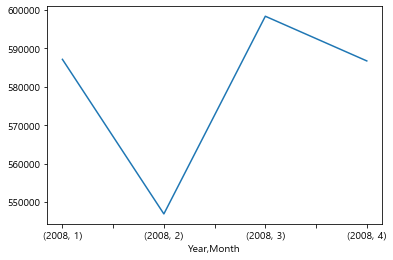

In [44]:
# 2. 결과에이터로 시각화(라인그래프)
result.plot()
plt.show()

In [47]:
# 3. 결과를 csv로 저장
# airline_depdelay.csv
result.to_csv('../data/airline/airline_depdelay.csv'
              , sep=","
              , index=True)

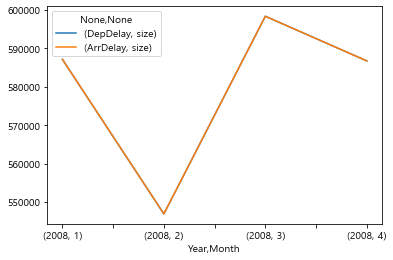

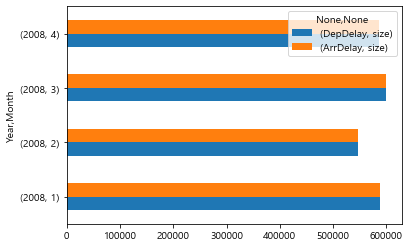

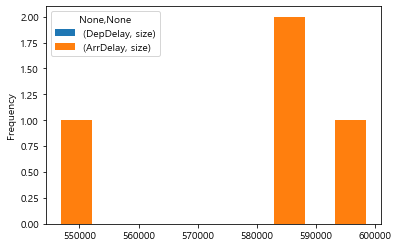

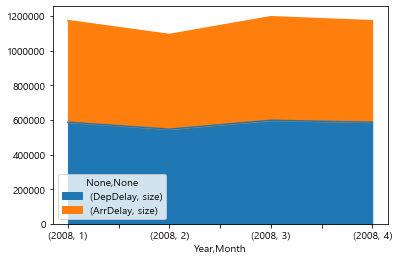

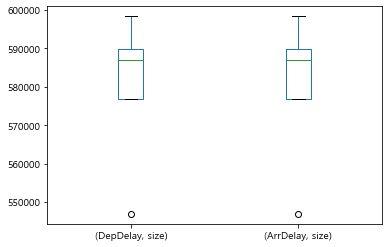

In [59]:
# 4. agg()를 이용해서 년월별로 depdelay, arrdelay를 

# 1) 각각 평균과 건수 출력
df_work.groupby(['Year', 'Month']) \
       .agg({'DepDelay': [np.mean, np.size], 
             'ArrDelay': [np.mean, np.size], 
            })

df_work.groupby(['Year']) \
       .agg({'DepDelay': [np.mean, np.size], 
             'ArrDelay': [np.mean, np.size], 
            })
result = df_work.groupby(['Year', 'Month']) \
                .agg({'DepDelay': [np.size], 
                      'ArrDelay': [np.size], 
                     })
result
# 2) 시각화 : line, barh, hist, area, box
result.plot()
plt.show()

result.plot(kind='barh')
plt.show()

result.plot(kind='hist')
plt.show()

result.plot(kind='area')
plt.show()

result.plot(kind='box')
plt.show()

# 3) 파일저장 : airline_delay_0.csv
result.to_csv('../data/airline/airline_delay_0.csv', 
              sep=',', index=False)

In [60]:
# 5. 출발지연건수, 도착지연건수 출력
# select year, month, count(depdelay), count(arrdelay) from airline;
# 1) 출력
# 2) 저장 : airline_delay_1.csv
result = df_work.groupby(['Year', 'Month']) \
       .agg({'DepDelay': np.size, 
             'ArrDelay': np.size, 
            })
result.to_csv('../data/airline/airline_delay_1.csv', 
              sep=',', index=False)

#### 9. 엑셀파일다루기

##### 1. 엑섹파일 읽기/쓰기

In [64]:
# 1. 엑셀읽기
df = pd.read_excel('../data/excel/학생시험성적.xlsx')
display(df)

df = pd.read_excel('../data/excel/학생시험성적.xlsx', sheet_name=1)
display(df)

df = pd.read_excel('../data/excel/학생시험성적.xlsx', sheet_name='2차시험')
display(df)

,학생,국어,영어,수학,평균
0,A,80,90,85,85.000000
1,B,90,95,95,93.333333
2,C,95,70,75,80.000000
3,D,70,85,80,78.333333
4,E,75,90,85,83.333333


,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


,학생,과학,사회,역사,평균
0,A,90,95,85,90.000000
1,B,85,90,80,85.000000
2,C,70,80,75,75.000000
3,D,75,90,100,88.333333
4,E,90,80,90,86.666667


In [66]:
df = pd.read_excel('../data/excel/학생시험성적.xlsx'
                   , sheet_name='2차시험', index_col = 0)
display(df)

df = pd.read_excel('../data/excel/학생시험성적.xlsx'
                   , sheet_name='2차시험', index_col = '학생')
display(df)

,과학,사회,역사,평균
학생,,,,
A,90,95,85,90.000000
B,85,90,80,85.000000
C,70,80,75,75.000000
D,75,90,100,88.333333
E,90,80,90,86.666667


,과학,사회,역사,평균
학생,,,,
A,90,95,85,90.000000
B,85,90,80,85.000000
C,70,80,75,75.000000
D,75,90,100,88.333333
E,90,80,90,86.666667


In [67]:
# 2. 엑셀쓰기
excel_data1 = {
    '학생': ['A', 'B', 'C', 'D', 'E', 'F'],
    '국어': [80,90,95,70,75,85],
    '영어': [90,95,70,85,90,95],
    '수학': [85,95,75,80,85,100]
}

df1 = pd.DataFrame(excel_data1, columns=['학생', '국어', '영어', '수학'])
df1

,학생,국어,영어,수학
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85
5,F,85,95,100


In [71]:
# 1) 엑셀저장 - 기본
excel_writer = pd.ExcelWriter('../data/excel/학생시험성적1.xlsx'
                              , engine='xlsxwriter')
type(excel_writer)
df1.to_excel(excel_writer, index=False)
excel_writer.save()

In [73]:
# 2) 엑셀저장 - sheetname
excel_writer2 = pd.ExcelWriter('../data/excel/학생시험성적2.xlsx'
                              , engine='xlsxwriter')
df1.to_excel(excel_writer2, index=False, sheet_name="중간고사")
excel_writer2.save()

In [74]:
excel_data2 = {
    '학생': ['A', 'B', 'C', 'D', 'E', 'F'],
    '국어': [80,90,95,70,75,100],
    '영어': [90,95,70,85,90,89],
    '수학': [85,95,75,80,85,99]
}

df2 = pd.DataFrame(excel_data2, columns=['학생', '국어', '영어', '수학'])
df2

,학생,국어,영어,수학
0,A,80,90,85
1,B,90,95,95
2,C,95,70,75
3,D,70,85,80
4,E,75,90,85
5,F,100,89,99


In [75]:
excel_writer3 = pd.ExcelWriter('../data/excel/학생시험성적3.xlsx'
                              , engine='xlsxwriter')
df1.to_excel(excel_writer3, index=False, sheet_name="중간고사")
df2.to_excel(excel_writer3, index=False, sheet_name="기말고사")
excel_writer3.save()

##### 2. 엑셀파일 통합하기, 저장

In [79]:
excel_data_files = ['../data/excel/담당자별_판매량_Andy사원.xlsx',
                    '../data/excel/담당자별_판매량_Becky사원.xlsx',
                    '../data/excel/담당자별_판매량_Chris사원.xlsx']

In [80]:
# 1. 통합하기
# 통합하기(1) - index
total_data = pd.DataFrame()
for f in excel_data_files:
    df = pd.read_excel(f)
    total_data = total_data.append(df)
total_data    

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
0,시계,B,나,154,108,155,114
1,구두,B,나,200,223,213,202
2,핸드백,B,나,350,340,377,392
0,시계,C,다,168,102,149,174
1,구두,C,다,231,279,277,292
2,핸드백,C,다,365,383,308,323


In [82]:
# 통합하기(2) - index 무시
total_data = pd.DataFrame()
for f in excel_data_files:
    df = pd.read_excel(f)
    total_data = total_data.append(df, ignore_index=True)
total_data   

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [86]:
# 통합하기(3) - glob 패키지사용
import glob

excel_data_files = glob.glob('../data/excel/담당자별_판매량_*사원.xlsx')
type(excel_data_files)

total_data = pd.DataFrame()
for f in excel_data_files:
    df = pd.read_excel(f)
    total_data = total_data.append(df, ignore_index=True)
total_data   

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331
3,시계,B,나,154,108,155,114
4,구두,B,나,200,223,213,202
5,핸드백,B,나,350,340,377,392
6,시계,C,다,168,102,149,174
7,구두,C,다,231,279,277,292
8,핸드백,C,다,365,383,308,323


In [87]:
# 2. 저장하기
excel_file_name = '../data/excel/담당자별_판매량_통합.xlsx'
excel_total_file_writer = pd.ExcelWriter(excel_file_name
                                         , engine='xlsxwriter')
total_data.to_excel(excel_total_file_writer, index=False
                    , sheet_name='담당자별_판매량_통합')
excel_total_file_writer.save()
glob.glob(excel_file_name)

['../data/excel/담당자별_판매량_통합.xlsx']

##### 3. 엑셀파일데이터 다루기

In [90]:
# 1. 데이터를 추가하고 변경하기
df = pd.read_excel('../data/excel/담당자별_판매량_Andy사원.xlsx')
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,331


In [92]:
df.loc[2, '4분기'] = 0
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198,123,120,137
1,구두,A,가,273,241,296,217
2,핸드백,A,가,385,316,355,0


In [93]:
# 데이터추가하기
df.loc[3, '제품명'] = '벨트'
df.loc[3, '담당자'] = 'A'
df.loc[3, '지역'] = '가'
df.loc[3, '1분기'] = 100
df.loc[3, '2분기'] = 150
df.loc[3, '3분기'] = 200
df.loc[3, '4분기'] = 250
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,A,가,198.0,123.0,120.0,137.0
1,구두,A,가,273.0,241.0,296.0,217.0
2,핸드백,A,가,385.0,316.0,355.0,0.0
3,벨트,A,가,100.0,150.0,200.0,250.0


In [94]:
df['담당자'] = 'Andy'
df

,제품명,담당자,지역,1분기,2분기,3분기,4분기
0,시계,Andy,가,198.0,123.0,120.0,137.0
1,구두,Andy,가,273.0,241.0,296.0,217.0
2,핸드백,Andy,가,385.0,316.0,355.0,0.0
3,벨트,Andy,가,100.0,150.0,200.0,250.0


In [95]:
excel_file_name = '../data/excel/담당자별_판매량_Andy사원_new.xlsx'
new_excel_file = pd.ExcelWriter(excel_file_name , engine='xlsxwriter')
df.to_excel(new_excel_file, index=False)
new_excel_file.save()
glob.glob(excel_file_name)

['../data/excel/담당자별_판매량_Andy사원_new.xlsx']

In [96]:
# 2. 여러개의 엑셀파일에서 데이터 수정하기
import re
filename = '../data/excel/담당자별_판매량_Andy사원.xlsx'
new_file_name = re.sub(".xlsx", "2.xlsx", filename)
new_file_name

'../data/excel/담당자별_판매량_Andy사원2.xlsx'

In [101]:
excel_data_files = glob.glob('../data/excel/담당자별_판매량_*사원.xlsx')

# list에 있는 엑섹파일갯수 만큼 반복
for f in excel_data_files:
    df = pd.read_excel(f)
    if(df.loc[1, '담당자'] == 'A'): df['담당자'] = 'Andy'
    elif (df.loc[1, '담당자'] == 'B'): df['담당자'] = 'Becky'
    elif (df.loc[1, '담당자'] == 'C'): df['담당자'] = 'Chris'
          
    # 엑셀파일이름에서 지정된 문자열 패턴을 찾아서 파일명을 변경
    f_new = re.sub(".xlsx", "2.xlsx", f)
    print(f_new)
    
    # 수정된 데이터를 새로운 파일명으로 저장
    new_excel_file = pd.ExcelWriter(f_new, engine='xlsxwriter')
    df.to_excel(new_excel_file, index=False)
    new_excel_file.save()     

glob.glob('../data/excel/담당자별_판매량_*사원?.xlsx')

../data/excel\담당자별_판매량_Andy사원2.xlsx
../data/excel\담당자별_판매량_Becky사원2.xlsx
../data/excel\담당자별_판매량_Chris사원2.xlsx


['../data/excel\\담당자별_판매량_Andy사원2.xlsx',
 '../data/excel\\담당자별_판매량_Becky사원2.xlsx',
 '../data/excel\\담당자별_판매량_Chris사원2.xlsx']

In [112]:
# 3. 엑셀의 필터기능 수행하기

df = pd.read_excel('../data/excel/담당자별_판매량_통합.xlsx')
df
df['제품명']
df['제품명'] == '핸드백'
handbag = df[df['제품명'] == '핸드백']
handbag
df[(df['제품명'] == '구두') | (df['제품명'] == '핸드백')]

# 조건설정
df[df['3분기'] >= 250]
df[(df['3분기'] >= 250) & (df['제품명'] == '핸드백')]

# 원하능 열만 선택
df[['제품명', '1분기', '2분기', '3분기', '4분기']]

,제품명,1분기,2분기,3분기,4분기
0,시계,198,123,120,137
1,구두,273,241,296,217
2,핸드백,385,316,355,331
3,시계,154,108,155,114
4,구두,200,223,213,202
5,핸드백,350,340,377,392
6,시계,168,102,149,174
7,구두,231,279,277,292
8,핸드백,365,383,308,323


In [123]:
# 4. 엑셀데이터계산하기
df = pd.read_excel('../data/excel/담당자별_판매량_통합.xlsx')
handbag = df[df['제품명'] == '핸드백']
display(handbag)

# 연간판매량 계산 및 컬럼추가
display(handbag.sum(axis=1))

handbag_sum = pd.DataFrame(handbag.sum(axis=1), columns=['연간판매량'])
display(handbag_sum)
handbag_total = handbag.join(handbag_sum)
display(handbag_total)

# 연간판매량으로 정렬
handbag_total.sort_values(by='연간판매량', ascending=False)

,제품명,담당자,지역,1분기,2분기,3분기,4분기
2,핸드백,A,가,385,316,355,331
5,핸드백,B,나,350,340,377,392
8,핸드백,C,다,365,383,308,323


2    1387
5    1459
8    1379
dtype: int64

,연간판매량
2,1387
5,1459
8,1379


,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379


,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
5,핸드백,B,나,350,340,377,392,1459
2,핸드백,A,가,385,316,355,331,1387
8,핸드백,C,다,365,383,308,323,1379


In [129]:
# 연습문제 - handbag_sum을 이용하여 열의 합계구하기
#     제품명 담당자 지역 1분기 2분기 3분기 4분기 연간판매량
# 2   핸드백   A     가    385   316   355   331  1387
# 5   핸드백   B     나    350   340   377   392  1459
# 8   핸드백   C     다    365   383   308   323  1379
# 합계 핸드백  전체  전체 1100  1039  1040  1046  4225
# 힌트) 열합계(axis=0), pivot(T메서드)변환, 합계행 수정

df = pd.read_excel('../data/excel/담당자별_판매량_통합.xlsx')
product_name = "핸드백"
handbag = df[df['제품명'] == product_name]

# 행별합계 구하고 마지막열에 추가
handbag_sum = pd.DataFrame(handbag.sum(axis=1), columns=['연간판매량'])
handbag_total = handbag.join(handbag_sum)

# 열별로 분지별합계와 연간판매량합계를 구한 후 마지막행에 추가
handbag_sum2 = pd.DataFrame(handbag_total.sum(), columns=['합계'])
handbag_sum2.T
handbag_total2 = handbag_total.append(handbag_sum2.T)
display(handbag_total2)

# 합계행에 문자열변경
handbag_total2.loc['합계', '제품명'] = product_name
handbag_total2.loc['합계', '담당자'] = '전체'
handbag_total2.loc['합계', '지역'] = '전체'

# 결과
display(handbag_total2)

,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백핸드백핸드백,ABC,가나다,1100,1039,1040,1046,4225


,제품명,담당자,지역,1분기,2분기,3분기,4분기,연간판매량
2,핸드백,A,가,385,316,355,331,1387
5,핸드백,B,나,350,340,377,392,1459
8,핸드백,C,다,365,383,308,323,1379
합계,핸드백,전체,전체,1100,1039,1040,1046,4225


##### 4. 엑셀파일의 시각화

In [131]:
# 1. 그래프를 엑셀파일 넣기
sales = {
    '시간': [9,10,11,12,13,14,15],
    '제품1': [10,15,12,11,12,14,13],
    '제품2': [9,11,14,12,13,10,12]
}
df = pd.DataFrame(sales, index=sales['시간'], columns=['제품1', '제품2'])
df.index.name = '시간'
df

,제품1,제품2
시간,,
9,10,9
10,15,11
11,12,14
12,11,12
13,12,13
14,14,10
15,13,12


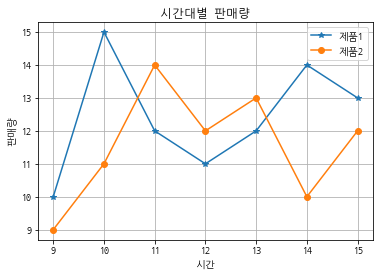

In [137]:
# 1) 한글처리 & 이미지파일 저장
import matplotlib
matplotlib.rcParams['font.family'] = 'NanumGothicCoding'
matplotlib.rcParams['axes.unicode_minus'] = False

product_plot = df.plot(grid=True, style=['-*', '-o'], 
                       title='시간대별 판매량')
product_plot.set_ylabel('판매량')
image_file = '../data/excel/fig_for_excel.png'
plt.savefig(image_file, dpi=400) # 그래프를 이미지파일로 저장
plt.show()

In [139]:
# 2) 엑셀 - 이미지파일 넣기

# a. ExcelWriter 객체생성
excel_file = '../data/excel/data_image_to_excel.xlsx'
excel_writer = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# b. df의 데이터를 지정된 엑셀시트에 쓰기
df.to_excel(excel_writer, index=True, sheet_name='Sheet1')

# c. ExcelWriter객체에서 워크시트(worksheet)객체 생성
worksheet = excel_writer.sheets['Sheet1']

# d. 워크시트에 차트가 들어갈 위치를 지정(D2=엑셀의 셀)
worksheet.insert_image('D2', image_file, {'x_scale':0.7, 'y_scale':0.7})
# worksheet.insert_image(1, 3, image_file, {'x_scale':0.7, 'y_scale':0.7})

# e. 엑셀파일 저장
excel_writer.save()

In [140]:
# 3) 엑셀 - 차트 넣기

# a. ExcelWriter 객체생성
excel_file = '../data/excel/data_chart_in_excel.xlsx'
excel_chart = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# b. df의 데이터를 지정된 엑셀시트에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# c. ExcelWriter 객체에서 workbook과 worksheet객체 생성
workbook = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# d. 차트객체생성(원하는 차트의 종류를 지정)
chart = workbook.add_chart({'type': 'line'})

# e. 차트생성을 위한 데이터값의 범위 지정
chart.add_series({'values': '=Sheet1!$B$2:$B$8'})
chart.add_series({'values': '=Sheet1!$C$2:$C$8'})

# f. 차트가 들어갈 위치 지정
worksheet.insert_chart('D2', chart)

# g. 파일저장
excel_chart.save()

In [144]:
# a. ExcelWriter 객체생성
excel_file = '../data/excel/data_chart_in_excel2.xlsx'
excel_chart = pd.ExcelWriter(excel_file, engine='xlsxwriter')

# b. df의 데이터를 지정된 엑셀시트에 쓰기
df.to_excel(excel_chart, index=True, sheet_name='Sheet1')

# c. ExcelWriter 객체에서 workbook과 worksheet객체 생성
workbook = excel_chart.book
worksheet = excel_chart.sheets['Sheet1']

# d. 차트객체생성(원하는 차트의 종류를 지정)
chart = workbook.add_chart({'type': 'line'})

# e-1. 차트생성을 위한 데이터값의 범위 지정
chart.add_series({'values': '=Sheet1!$B$2:$B$8',
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$B$1'})
chart.add_series({'values': '=Sheet1!$C$2:$C$8',
                  'categories': '=Sheet1!$A$2:$A$8',
                  'name': '=Sheet1!$C$1'})

# e-2. 차트에 x,y축이름, 제목추가
chart.set_title({'name': '시간대별 판매량'})
chart.set_x_axis({'name': '시간'})
chart.set_y_axis({'name': '판매량'})

# f. 차트가 들어갈 위치 지정
worksheet.insert_chart('D2', chart)

# g. 파일저장
excel_chart.save()

#### 10. html 파일다루기

In [147]:
# LG전자 주식
url = 'https://finance.naver.com/item/sise_day.nhn?code=066570'
df = pd.read_html(url)
df
display(df[0])
display(df[1])

,날짜,종가,전일비,시가,고가,저가,거래량
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.04.02,49300.0,1200.0,49100.0,50000.0,48500.0,1066010.0
2,2020.04.01,48100.0,100.0,48250.0,50800.0,47850.0,1298461.0
3,2020.03.31,48200.0,300.0,49100.0,49500.0,47600.0,1106424.0
4,2020.03.30,48500.0,900.0,48400.0,49200.0,47100.0,937027.0
5,2020.03.27,49400.0,400.0,51300.0,51500.0,48000.0,1110394.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2020.03.26,49000.0,500.0,49450.0,51300.0,48600.0,1377158.0


,0,1,2,3,4,5,6,7,8,9,10,11
0,1,2,3,4,5,6,7,8,9,10,다음,맨뒤


In [223]:
# read_html 실습 : 증권거래소
url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
code_df = pd.read_html(url, header=0)[0]
code_df.head()

# 종목코드가 6자리
code_df.종목코드 = code_df.종목코드.map('{:06d}'.format)
code_df.head()


# 회사명, 종목코드 -> 영문으로 변경
code_df = code_df[['회사명', '종목코드']]
code_df = code_df.rename(columns={'회사명':'name', '종목코드':'code'})
display(code_df.head())

,name,code
0,DSR,155660
1,GS,078930
2,GS글로벌,001250
3,HDC현대산업개발,294870
4,LG이노텍,011070


In [224]:
# 함수생성 : 종목이름을 입력하면 종목코드를 리턴함수
# 네이버금융(http://finance.naver.com)
def get_url(item_name, code_df):
    code = code_df.query(
        "name=='{}'".format(item_name))['code'].to_string(index=False)
    code = code.strip()
    url = 'https://finance.naver.com/item/sise_day.nhn?code={code}'.format(code=code)
    print("요청 URL = {}".format(url))
    return url

# LG전자 일자데이터 url가져오기
item_name="LG전자"
url = get_url(item_name, code_df)

요청 URL = https://finance.naver.com/item/sise_day.nhn?code=066570


In [225]:
# df 생성
df = pd.DataFrame()

# 1~20페이지까지의 데이터만 가져오기
for page in range(1,21):
    pg_url = '{url}&page={page}'.format(url=url, page=page)
    # print(pg_url)
    df = df.append(pd.read_html(pg_url, header=0)[0], ignore_index=True)
    
# 결측값 행 제거
df = df.dropna() # 기본값 how='any'
df.tail()

,날짜,종가,전일비,시가,고가,저가,거래량
294,2019.06.20,80500.0,300.0,80700.0,81500.0,80000.0,426167.0
295,2019.06.19,80800.0,500.0,82000.0,82200.0,80000.0,600944.0
296,2019.06.18,81300.0,600.0,81100.0,81600.0,80700.0,336762.0
297,2019.06.17,80700.0,0.0,80500.0,82600.0,80400.0,511634.0
298,2019.06.14,80700.0,1200.0,81500.0,81700.0,79800.0,697659.0


In [226]:
# 한글을 영문으로 변환
df = df.rename(columns={'날짜':'date', '종가':'close', '전일비': 'diff',
                        '시가':'open','고가':'high','저가':'low','거래량':'volumn'})
display(df.head())

# 문자열을 정수로 변환
df[['close','diff','open','high','low','volumn']] \
  = df[['close','diff','open','high','low','volumn']].astype(int)
display(df.head())

# 'date'의 타입을 date형으로 변환
df['date'] = pd.to_datetime(df['date'])

# 일자기준을 오름차순으로 변경
df = df.sort_values(by=['date'], ascending=True)
df.head()

,date,close,diff,open,high,low,volumn
1,2020.04.02,49300.0,1200.0,49100.0,50000.0,48500.0,1066010.0
2,2020.04.01,48100.0,100.0,48250.0,50800.0,47850.0,1298461.0
3,2020.03.31,48200.0,300.0,49100.0,49500.0,47600.0,1106424.0
4,2020.03.30,48500.0,900.0,48400.0,49200.0,47100.0,937027.0
5,2020.03.27,49400.0,400.0,51300.0,51500.0,48000.0,1110394.0


,date,close,diff,open,high,low,volumn
1,2020.04.02,49300,1200,49100,50000,48500,1066010
2,2020.04.01,48100,100,48250,50800,47850,1298461
3,2020.03.31,48200,300,49100,49500,47600,1106424
4,2020.03.30,48500,900,48400,49200,47100,937027
5,2020.03.27,49400,400,51300,51500,48000,1110394


,date,close,diff,open,high,low,volumn
298,2019-06-14,80700,1200,81500,81700,79800,697659
297,2019-06-17,80700,0,80500,82600,80400,511634
296,2019-06-18,81300,600,81100,81600,80700,336762
295,2019-06-19,80800,500,82000,82200,80000,600944
294,2019-06-20,80500,300,80700,81500,80000,426167


In [227]:
# 시각화
import plotly.offline as offline 
import plotly.graph_objs as go

In [228]:
# jupyter notebook에서 출력
offline.init_notebook_mode(connected=True)
trace = go.Scatter(x=df.date, y=df.close,name=item_name)
# print(type(trace))
# print(trace)

data = [trace]
# print(type(data))
# print(data)

In [229]:
layout = dict(
            title='{}의 주가(종가기준) Time Series'.format(item_name),
            xaxis=dict(
                rangeselector=dict(
                    buttons=list([
                        dict(count=1,
                             label='1M',  # 한글은 에러
                             step='month',
                             stepmode='backward'),
                        dict(count=3,
                             label='3M',
                             step='month',
                             stepmode='backward'),
                        dict(count=6,
                             label='6M',
                             step='month',
                             stepmode='backward'),
                        dict(step='all')
                    ])
                ),
                rangeslider=dict(),
                type='date'
            )
        )

In [230]:
# 시각화
fig = go.Figure(data=data, layout=layout)
offline.iplot(fig)

#### 11. SQL 데이터 추출(미완)

>* https://wikidocs.net/20919
* https://pypi.org/project/pandasql/
* https://www.kaggle.com/dataraj/sql-on-pandas-dataframe-using-pandasql

* !pip install pandasql
* !pip install pysqldf

In [ ]:
import pandas as pd
from pandasql import *
#from pysqldf import SQLDF

In [ ]:
# SQL 언어 활용을 위한 라이브러리, 쿼리 작성
df = pd.read_csv("../R/food.csv", encoding='ms949')
df.head()

In [ ]:
q = "SELECT count(*) FROM df WHERE CLAC1_NM = '과일'"
print(sqldf(q, locals()))

In [ ]:
# SQL group by 함수를 이용한 집계 처리
q = """
    SELECT CLAC1_NM, count(CLAC1_NM) as count
    FROM df 
    GROUP BY CLAC1_NM 
    """
print(sqldf(q, locals()))

In [ ]:
# 테이블 조인
ios = pd.read_csv("/Users/woowahan/Documents/Python/DS_Ext_School/tutorial_01/ios.csv")

q = """
  SELECT A.*, B.flag 
  FROM df A
  LEFT JOIN
  (SELECT sessionid, flag
  FROM ios) B
  ON A.sessionid = B.sessionid
  WHERE B.flag = 'iOS'
  """
print sqldf(q, locals()).to_string()

In [255]:
# Basics
# The main function used in pandasql is sqldf. sqldf accepts 2 parametrs - a sql query string - an set of 
# session/environment variables (locals() or globals())
# Specifying locals() or globals() can get tedious. You can defined a short helper function to fix this.

from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [256]:
from pandasql import sqldf, load_meat, load_births
pysqldf = lambda q: sqldf(q, globals())
meat = load_meat()
births = load_births()
print(pysqldf("SELECT * FROM meat LIMIT 10;").head())

                         date   beef   veal    pork  lamb_and_mutton broilers  \
0  1944-01-01 00:00:00.000000  751.0   85.0  1280.0             89.0     None   
1  1944-02-01 00:00:00.000000  713.0   77.0  1169.0             72.0     None   
2  1944-03-01 00:00:00.000000  741.0   90.0  1128.0             75.0     None   
3  1944-04-01 00:00:00.000000  650.0   89.0   978.0             66.0     None   
4  1944-05-01 00:00:00.000000  681.0  106.0  1029.0             78.0     None   

  other_chicken turkey  
0          None   None  
1          None   None  
2          None   None  
3          None   None  
4          None   None  


In [253]:
q = """SELECT
        m.date, m.beef, b.births
     FROM
        meats m
     INNER JOIN
        births b
           ON m.date = b.date;"""
joined = pyqldf(q)
print(joined.head())

NameError: name 'pyqldf' is not defined

In [252]:
q = "select
           strftime('%Y', date) as year
           , SUM(beef) as beef_total
           FROM
              meat
           GROUP BY
              year;"
print pysqldf(q).head()

SyntaxError: EOL while scanning string literal (<ipython-input-252-6a41682298c4>, line 1)